# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd

root_dir = "/Users/jay/Documents/Documents - Jay's Macbook Pro (13281)/MSc Data Science & Analytics - UoL/Semester 2/Machine Learning/Coursework/" # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)

# Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

/Users/jay/Documents/Documents - Jay's Macbook Pro (13281)/MSc Data Science & Analytics - UoL/Semester 2/Machine Learning/Coursework/Data-for-students-regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Sample Answer to Exercise 1**

In [2]:
# Read in the training data and target files
training_data = pd.read_csv(training_data_path)
training_targets = pd.read_csv(training_targets_path)

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

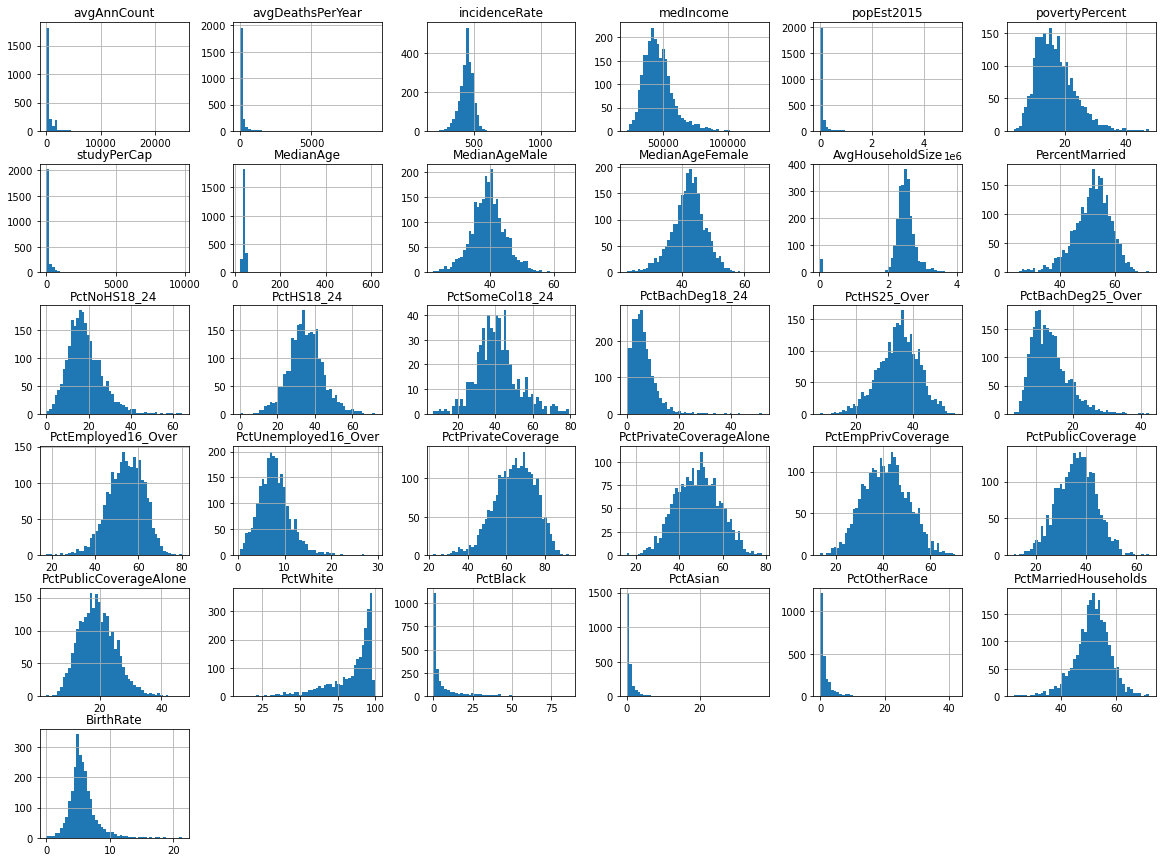

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate histograms for each numerical feature in the training_data df
training_data.hist(bins=50, figsize=(20, 15))

# Set x and y axis labels
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

# Display the histograms
plt.show()


The histograms show that some features have unusual values or outliers. Some plots have significantly taller or shorter bars than the rest of the data while some other plots have unusual distribution patterns, showing multiple peaks -  indicating potential outliers.

| **Plots/features with significantly taller or shorter bars** | **Plots/features with unusual distribution patterns** |
| :-- | :-- |
| avgAnnCount | povertyPercent |
| avgDeathsPerYear | medianAgeMale |
| popEst2015 | medianAgeFemale |
| PctOtherRace | avgHouseholdSize |
| medianAge | PercentMarried |
| PctBlack | PctHS18_24 |
| PctAsian | PctSomeCol18_24 |
| | PctHS25_Over |
| | PctBachDeg25_Over |
| | PctUnemployed16_Over |
| | PctPrivateCoverage |
| | PctPrivateCoverageAlone |
| | PctEmpPrivCoverage |
| | PctPublicCoverage |
| | PctPublicCoverageAlone |


1. PctBachDeg25_Over: 0.491
2. incidenceRate: 0.444
3. PctPublicCoverageAlone: 0.440
4. medIncome: 0.417
5. povertyPercent: 0.413


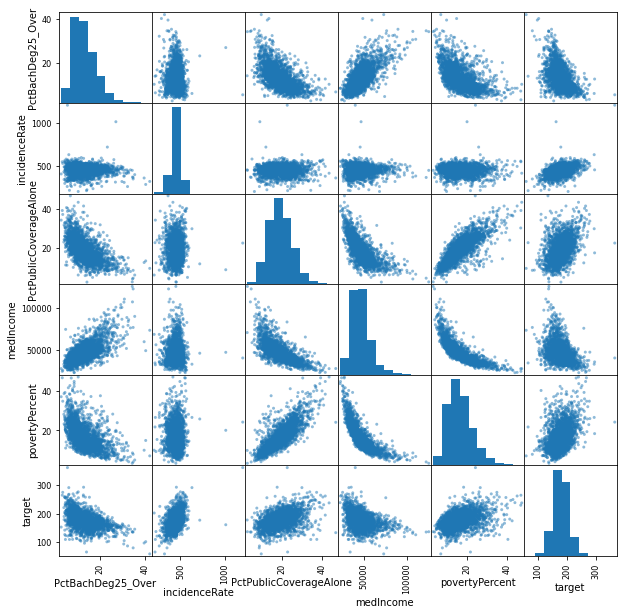

In [5]:
# Compute correlations of all features with the target variable
correlations = training_data.corrwith(training_targets['TARGET_deathRate'])

# Sort the correlations in descending order and select the top five
top_correlations = correlations.abs().sort_values(ascending=False).head(5)

# Print the top correlations with their correlation values
for i, feature in enumerate(top_correlations.index, start=1):
    correlation_value = top_correlations[feature]
    print(f"{i}. {feature}: {correlation_value:.3f}")


# Get the column indices for the top features
top_feature_indices = [training_data.columns.get_loc(feature) for feature in top_correlations.index]

# Select the top features and the target variable from the training data
selected_data = training_data.iloc[:, top_feature_indices].copy()
selected_data.loc[:, 'target'] = training_targets['TARGET_deathRate']

# Plot the scatter matrix
pd.plotting.scatter_matrix(selected_data, figsize=(10, 10))
plt.show()

In [6]:
# Compute the correlation matrix of the selected features
correlation_matrix = selected_data.corr()

From the scatter matrix, there are some visible correlations between certain pairs of features.

* **povertyPercent and PctPublicCoverageAlone:** Strong positive correlation (0.79)
* **medIncome and povertyPercent:** Strong negative correlation (-0.78)
* **medIncome and PctPublicCoverageAlone:** Strong negative correlation (-0.71)
* **PctBachDeg25_Over and medianIncome:** Strong positive correlation (0.69)


Intuitively, the correlations make sense.
* **povertyPercent and PctPublicCoverageAlone:** the higher the poverty rate, the higher the reliance on only public coverage
* **medIncome and povertyPercent:** the higher the income, the lower the poverty rate
* **medIncome and PctPublicCoverageAlone:** the higher the income, the less likely to rely on only public coverage
* **PctBachDeg25_Over and medianIncome:** the more qualified a county is, the more income they are likely make as a result of better jobs.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Sample Answer to Exercise 2**

In [7]:
# Check for missing values
missing_values = training_data.isnull().sum()
print(missing_values)

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
dtype: i

In [8]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the preprocessing steps
preprocessing_steps = [
    ('imputer', SimpleImputer(strategy="median")), # Impute missing records withmedian
    ('scaling', StandardScaler()),   # Standardize the features by removing the mean and scaling to unit variance
    #('polynomial', PolynomialFeatures(degree=2)),  # Generate polynomial features up to degree 2
]


# Create the ML pipeline
ml_pipeline = Pipeline(steps=preprocessing_steps)

# Fit and transform the training data
processed_data = ml_pipeline.fit_transform(training_data)

# Convert processed_data back to DataFrame
#processed_data_df = pd.DataFrame(processed_data, columns=ml_pipeline.named_steps['polynomial'].get_feature_names(training_data.columns))
processed_data_df = pd.DataFrame(processed_data, columns=training_data.columns)

# Print the first few rows of the processed data DataFrame
#print(processed_data_df.head())


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Sample Answer to Exercise 3**

**Fit all three models**

In [9]:
# Split preprocessed data into train & test sets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(processed_data_df, training_targets, test_size=0.2, random_state=42)

# Reshape y_train to 1D array
y_train = np.ravel(y_train)

# Define a range of regularization weights
alphas = [0.1, 1, 10, 100, 1000]

# Lasso model
lasso_grid = GridSearchCV(Lasso(), {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error') # Perform GridSearchCV for Lasso model
lasso_grid.fit(X_train, y_train)
best_lasso_alpha = lasso_grid.best_params_['alpha'] # Get the best regularization weight (alpha)
print("Lasso alpha:", best_lasso_alpha)

# Ridge model
ridge_grid = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error') # Perform GridSearchCV for Ridge model
ridge_grid.fit(X_train, y_train)
best_ridge_alpha = ridge_grid.best_params_['alpha'] # Get the best regularization weight (alpha)
print("Ridge alpha:", best_ridge_alpha)



Lasso alpha: 0.1
Ridge alpha: 10


The regularisation weights (alphas) for Lasso and Ridge regressions are 1 and 1,000 respectively.

They were automatically chosen using a grid search approach to search for the best weight within the specified range of alpha values [0.1, 1, 10, 100, 1000].

scikit-learn's GridSearchCV was used on the Lasso and Ridge models. Using a 5-fold cross-validation method for both models, each alpha value in the range was trained and evaluated multiple times using 5 different subsets of the training data. 

This resulted in the regularisation weights being automatically determined based on their performance in the cross-validation.


**Quantitative comparison of model performance - MSE & R-squared**

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Fit OLS model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Fit Lasso model
lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)

# Fit Ridge model
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)

# Predict using the trained models
ols_pred = ols_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Calculate performance metrics
ols_mse = mean_squared_error(y_test, ols_pred)
ols_rmse = np.sqrt(ols_mse)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

ols_r2 = r2_score(y_test, ols_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("MSE - RMSE: OLS:", ols_mse, ols_rmse)
print("MSE - RMSE: Lasso:", lasso_mse, lasso_rmse)
print("MSE - RMSE: Ridge:", ridge_mse, ridge_rmse)

print("R2 - OLS:", ols_r2)
print("R2 - Lasso:", lasso_r2)
print("R2 - Ridge:", ridge_r2)

MSE - RMSE: OLS: 349.8020888889968 18.70299678899071
MSE - RMSE: Lasso: 352.59557102496854 18.777528352394214
MSE - RMSE: Ridge: 349.9710787133725 18.70751396400314
R2 - OLS: 0.5749422521069577
R2 - Lasso: 0.5715477863126943
R2 - Ridge: 0.574736906180082


In [11]:
# Print out the winning model and its performance metrics
if ols_rmse <= lasso_rmse and ols_rmse <= ridge_rmse:
    print("Winning Model: OLS Model")
    print("RMSE: {:.3f}".format(ols_rmse))
    print("R2: {:.3f}".format(ols_r2))
elif lasso_rmse <= ols_rmse and lasso_rmse <= ridge_rmse:
    print("Winning Model: Lasso Model")
    print("RMSE: {:.3f}".format(lasso_rmse))
    print("R2: {:.3f}".format(lasso_r2))
else:
    print("Winning Model: Ridge Model")
    print("RMSE: {:.3f}".format(ridge_rmse))
    print("R2: {:.3f}".format(ridge_r2))

Winning Model: OLS Model
RMSE: 18.703
R2: 0.575


The Root Mean Squared Error (MSE) of each model was used to evaluate the best model. The RMSE measures the average magnitude of the difference between the predicted and actual values. The lower the MSE value, the better the model.

By comparing each model's RMSE, the OLS Model is the winning model because it has the lowest RMSE of 18.690. By contrast, Ridge's RMSE is 18.694 while Lasso's RMSE is 18.773.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [12]:
from sklearn.linear_model import Lasso

# Fit Lasso model with the chosen alpha
lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)

# Get feature coefficients
feature_coeffs = lasso_model.coef_

# Find top five features
top_features_indices = np.argsort(np.abs(feature_coeffs))[-5:]
top_features = X_train.columns[top_features_indices]

# Sort features in descending order of importance
top_features = top_features[::-1]

# Print the top five features and their importance
for i, (feature, coeff) in enumerate(zip(top_features, feature_coeffs[top_features_indices][::-1]), 1):
    coeff_rounded = round(coeff, 2)
    print(f"{i}. {feature}: {coeff_rounded}")

1. incidenceRate: 10.45
2. PctBachDeg25_Over: -7.32
3. PctPrivateCoverage: -6.1
4. PctMarriedHouseholds: -5.23
5. PercentMarried: 4.43


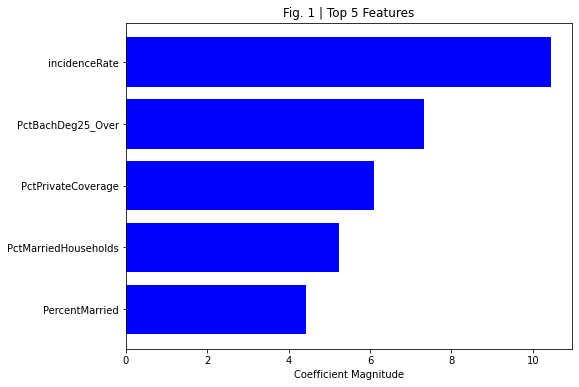

In [13]:
# Plot the top five features and their coefficients
plt.figure(figsize=(8, 6))
plt.barh(range(len(top_features)), np.abs(feature_coeffs[top_features_indices][::-1]), color='blue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Coefficient Magnitude')
plt.title('Fig. 1 | Top 5 Features')
plt.gca().invert_yaxis()  # Invert the y-axis to display features in descending order
plt.show()

**The five most important features as shown in Fig. 1 above are:**
* incidenceRate: 10.45
* PctBachDeg25_Over: -7.32
* PctPrivateCoverage: -6.1
* PctMarriedHouseholds: -5.23
* PercentMarried: 4.43

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Sample Answers for Exercise 5**

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Fit Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model with cross-validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rsme_cv = np.sqrt(-rf_scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    
display_scores(rf_rsme_cv)

Scores: [19.0907355  18.51685596 18.81140871 19.20757345 19.07676915]
Mean: 18.940668554397813
Standard Deviation: 0.24843788499814579


In [15]:
# Evaluate OLS model with cross-validation
ols_scores = cross_val_score(ols_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ols_rsme_scores = np.sqrt(-ols_scores)
display_scores(ols_rsme_scores)

Scores: [20.23846702 18.82990606 19.86712853 18.97830044 20.37389661]
Mean: 19.657539731281737
Standard Deviation: 0.6388919574249242


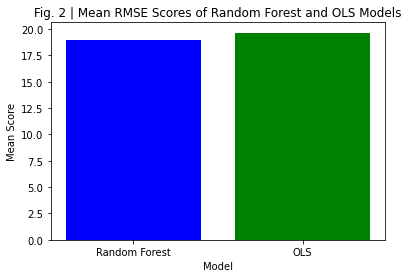

In [16]:
# Get mean values
rf_mean = rf_rsme_cv.mean()
ols_mean = ols_rsme_scores.mean()

# Create a bar plot
methods = ['Random Forest', 'OLS']
means = [rf_mean, ols_mean]
colors = ['blue', 'green']

plt.bar(methods, means, color=colors)
plt.xlabel('Model')
plt.ylabel('Mean Score')
plt.title('Fig. 2 | Mean RMSE Scores of Random Forest and OLS Models')
plt.show()

We see that the RMSE for the Random Forest model (18.9) is lower than that of the OLS model (19.6), therefore highlighting that the Random Forest is a better model - Fig. 2

In [17]:
# Predict using the Random Forest model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

#print("MSE: ", rf_mse)
print("RMSE: ", rf_rmse)

RMSE:  19.73400290222645


On evaluating with the test data on the Random Forest model, we see that the RMSE here (19.6) is only just higher than the RMSE when cross-validating (18.9), giving confidence in the model because the values of both evaluations are not significantly different.

In [18]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Get indices of the top five most important features in descending order
top_features_indices_rf = np.argsort(feature_importances)[::-1][:5]
top_features_rf = processed_data_df.columns[top_features_indices_rf]

# Print the top five most important features from Random Forest model
print("Top Five Features - Random Forest:")
for feature in top_features_rf:
    importance = feature_importances[top_features_indices_rf][top_features_rf.tolist().index(feature)]
    importance_rounded = round(importance, 3)
    print(f"{feature}: {importance_rounded}")


Top Five Features - Random Forest:
PctBachDeg25_Over: 0.212
incidenceRate: 0.197
medIncome: 0.047
PctHS25_Over: 0.044
avgDeathsPerYear: 0.038


The output above shows the top 5 features using the Random Forest model

**Random Forest - OLS Comparison**

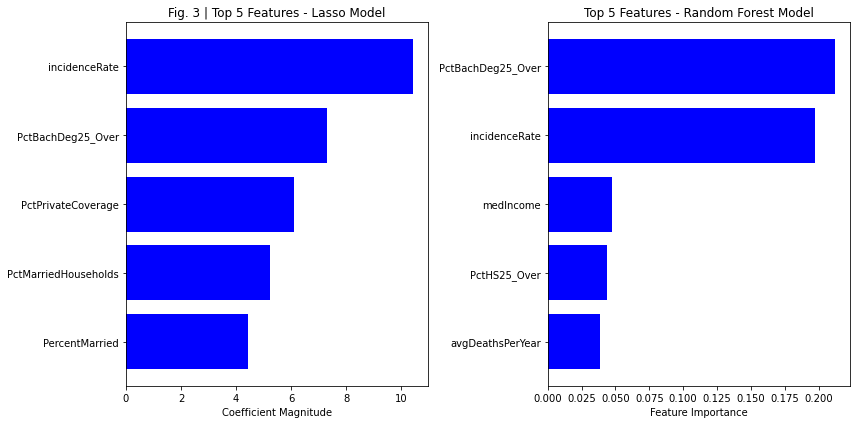

In [19]:
# Plot the top five features and their coefficients
plt.figure(figsize=(12, 6))

# Plot the Lasso coefficients
plt.subplot(121)
plt.barh(range(len(top_features)), np.abs(feature_coeffs[top_features_indices][::-1]), color='blue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Coefficient Magnitude')
plt.title('Fig. 3 | Top 5 Features - Lasso Model')
plt.gca().invert_yaxis()  # Invert the y-axis to display features in descending order


# Plot the Random Forest importances
plt.subplot(122)
plt.barh(range(len(top_features_rf)), feature_importances[top_features_indices_rf][::-1], color='blue')
plt.yticks(range(len(top_features_rf)), top_features_rf[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 5 Features - Random Forest Model')

plt.tight_layout()
plt.show()

Fig. 3 above shows that the 5 most important features are different for the Lasso and Random Forest models. However, two features make the top 5 of both models:
* incidenceRate
* PctBachDeg25_Over
    
These features are the top 2 features for both models.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [20]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

# Preprocess the test data

# Handle missing values
imputer = SimpleImputer(strategy="median")
test_data_imputed = imputer.fit_transform(test_data)

# Scale the test data
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data_imputed)

## Retrain your chosen regression model here 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the unseen data
test_pred = lin_reg.predict(test_data_scaled)

# Evaluate predictions
mse = mean_squared_error(test_targets, test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_targets, test_pred)

print("The MSE of the best model is ", round(mse, 2))
print("The RMSE of the best model is ", round(rmse, 2))
print("The R-squared of the best model is ", round(r2, 2))

The MSE of the best model is  502.19
The RMSE of the best model is  22.41
The R-squared of the best model is  0.34


# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [21]:
root_dir = "/Users/jay/Documents/Documents - Jay's Macbook Pro (13281)/MSc Data Science & Analytics - UoL/Semester 2/Machine Learning/Coursework/" # this is to be defined by you 
local_path = "Data-for-students-classification/" # store the related data files in this folder
data_dir = root_dir + local_path
print(data_dir)

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'

# Read the data features
data_features = pd.read_csv(data_features_path)
data_targets = pd.read_csv(data_targets_path)

/Users/jay/Documents/Documents - Jay's Macbook Pro (13281)/MSc Data Science & Analytics - UoL/Semester 2/Machine Learning/Coursework/Data-for-students-classification/


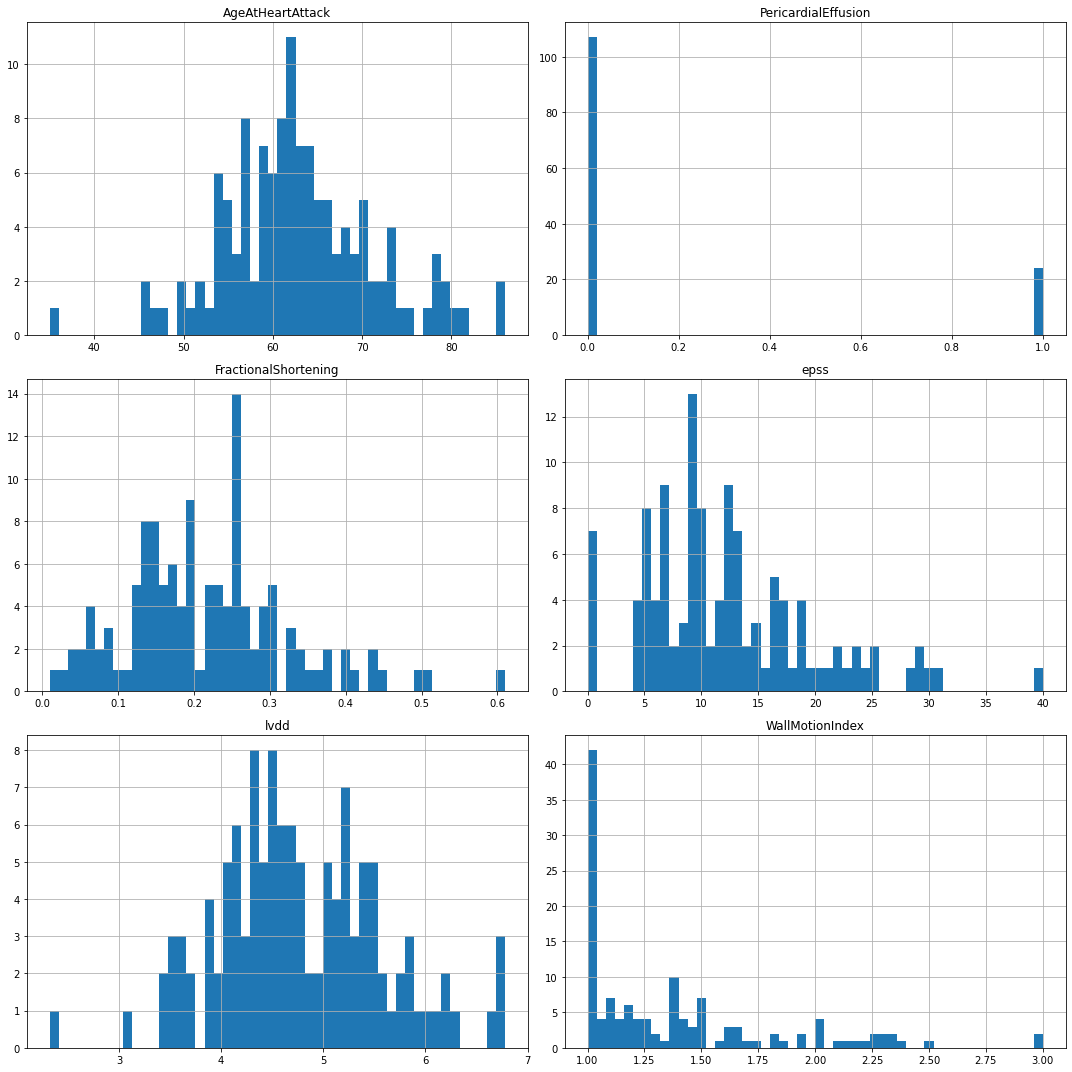

In [22]:
# Plot histograms of all features
data_features.hist(bins=50, figsize=(15, 15))
plt.tight_layout()
plt.show()

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer to exclude specific column from imputation - PericardialEffusion because it is binary. Can't change its 0 values
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, imputer, columns_to_exclude):
        self.imputer = imputer
        self.columns_to_exclude = columns_to_exclude

    def fit(self, X, y=None):
        columns_to_impute = [col for col in X.columns if col not in self.columns_to_exclude]
        self.imputer.fit(X[columns_to_impute])
        return self

    def transform(self, X):
        columns_to_impute = [col for col in X.columns if col not in self.columns_to_exclude]
        X_imputed = X.copy()
        X_imputed[columns_to_impute] = self.imputer.transform(X_imputed[columns_to_impute])
        return X_imputed

# Define columns for transformation
columns_to_transform = ['AgeAtHeartAttack', 'FractionalShortening', 'epss', 'lvdd', 'WallMotionIndex']

# Create the pipeline
pipeline = Pipeline([
    ('imputer', CustomImputer(SimpleImputer(strategy='median'), columns_to_exclude=['PericardialEffusion'])),
    ('scaler', ColumnTransformer(
        transformers=[('scaler', StandardScaler(), columns_to_transform)],
        remainder='passthrough'
    ))
])

# Fit and transform the features using the pipeline
data_features_preprocessed = pipeline.fit_transform(data_features)

# Convert the preprocessed features back to a DataFrame
data_features_df = pd.DataFrame(data_features_preprocessed, columns=data_features.columns)

# Display the preprocessed features
#print(data_features_df.head())


# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_features_df, data_targets.values.ravel(), test_size=0.2, random_state=42)

# Logistic Regression without regularization
logreg = LogisticRegression(penalty='none', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression without regularization:")
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))
print("\n")

# Logistic Regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='saga')
logreg_l1.fit(X_train, y_train)
y_pred_l1 = logreg_l1.predict(X_test)

# Evaluate performance
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

print("Logistic Regression with L1 regularization:")
print("Accuracy: {:.2%}".format(accuracy_l1))
print("Precision: {:.2f}".format(precision_l1))
print("F1 Score: {:.2f}".format(f1_l1))
print("\n")

# Logistic Regression with L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', solver='lbfgs')
logreg_l2.fit(X_train, y_train)
y_pred_l2 = logreg_l2.predict(X_test)

# Evaluate performance
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print("Logistic Regression with L2 regularization:")
print("Accuracy: {:.2%}".format(accuracy_l2))
print("Precision: {:.2f}".format(precision_l2))
print("F1 Score: {:.2f}".format(f1_l2))


Logistic Regression without regularization:
Accuracy: 70.37%
Precision: 0.43
F1 Score: 0.43


Logistic Regression with L1 regularization:
Accuracy: 74.07%
Precision: 0.50
F1 Score: 0.46


Logistic Regression with L2 regularization:
Accuracy: 70.37%
Precision: 0.43
F1 Score: 0.43


By evaluating/predicting with the test data, the model with L1 Regularisation appears to be the best model as shown in the output above. The L2 Regularisation model has a higher accuracy, precision, and F1 score.

To further evaluate the three models in a more consistent way, they are cross-validated below.

**Cross Validation**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation for no regularisation model
scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
mean_score = np.mean(scores)

# Cross-validation for L1 model
l1_scores = cross_val_score(logreg_l1, X_train, y_train, cv=5, scoring='accuracy')
l1_mean_score = np.mean(l1_scores)

# Cross-validation for L2 model
l2_scores = cross_val_score(logreg_l2, X_train, y_train, cv=5, scoring='accuracy')
l2_mean_score = np.mean(l2_scores)

print("Cross-Validation Mean Accuracy Results:")
print("No Regularization Mean Accuracy: {:.2%}".format(mean_score))
print("L1 Regularization Mean Accuracy: {:.2%}".format(l1_mean_score))
print("L2 Regularization Mean Accuracy: {:.2%}".format(l2_mean_score))
print("\n")

# Cross-validation for no regularisation model
scores_f1 = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1')
mean_score_f1 = np.mean(scores_f1)

# Cross-validation for L1 model
l1_scores_f1 = cross_val_score(logreg_l1, X_train, y_train, cv=5, scoring='f1')
l1_mean_score_f1 = np.mean(l1_scores_f1)

# Cross-validation for L2 model
l2_scores_f1 = cross_val_score(logreg_l2, X_train, y_train, cv=5, scoring='f1')
l2_mean_score_f1 = np.mean(l2_scores_f1)

print("Cross-Validation F1 Score Results:")
print("No Regularization F1: {:.2f}".format(mean_score_f1))
print("L1 Regularization F1: {:.2f}".format(l1_mean_score_f1))
print("L2 Regularization F1: {:.2f}".format(l2_mean_score_f1))
print("\n")

# Cross-validation for no regularisation model
scores_p = cross_val_score(logreg, X_train, y_train, cv=5, scoring='precision')
mean_score_p = np.mean(scores_p)

# Cross-validation for L1 model
l1_scores_p = cross_val_score(logreg_l1, X_train, y_train, cv=5, scoring='precision')
l1_mean_score_p = np.mean(l1_scores_p)

# Cross-validation for L2 model
l2_scores_p = cross_val_score(logreg_l2, X_train, y_train, cv=5, scoring='precision')
l2_mean_score_p = np.mean(l2_scores_p)

print("Cross-Validation Precision Results:")
print("No Regularization Precision: {:.2f}".format(mean_score_p))
print("L1 Regularization Precision: {:.2f}".format(l1_mean_score_p))
print("L2 Regularization Precision: {:.2f}".format(l2_mean_score_p))


Cross-Validation Mean Accuracy Results:
No Regularization Mean Accuracy: 71.24%
L1 Regularization Mean Accuracy: 71.19%
L2 Regularization Mean Accuracy: 72.14%


Cross-Validation F1 Score Results:
No Regularization F1: 0.42
L1 Regularization F1: 0.37
L2 Regularization F1: 0.39


Cross-Validation Precision Results:
No Regularization Precision: 0.51
L1 Regularization Precision: 0.53
L2 Regularization Precision: 0.55


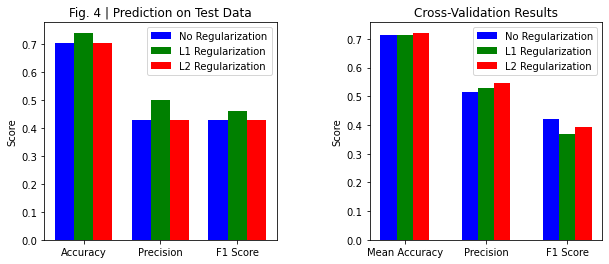

In [26]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define the metrics for Plot A
metrics_a = ['Accuracy', 'Precision', 'F1 Score']
no_reg_scores_a = [accuracy, precision, f1]
l1_scores_a = [accuracy_l1, precision_l1, f1_l1]
l2_scores_a = [accuracy_l2, precision_l2, f1_l2]
bar_width_a = 0.25
r1_a = np.arange(len(metrics_a))
r2_a = [x + bar_width_a for x in r1_a]
r3_a = [x + bar_width_a for x in r2_a]

# Plot the bars for Plot A
axes[0].bar(r1_a, no_reg_scores_a, color='blue', width=bar_width_a, label='No Regularization')
axes[0].bar(r2_a, l1_scores_a, color='green', width=bar_width_a, label='L1 Regularization')
axes[0].bar(r3_a, l2_scores_a, color='red', width=bar_width_a, label='L2 Regularization')
axes[0].set_xticks([r + bar_width_a for r in range(len(metrics_a))])
axes[0].set_xticklabels(metrics_a)
axes[0].set_title('Fig. 4 | Prediction on Test Data')
axes[0].set_ylabel('Score')
axes[0].legend()

# Define the methods for Plot B
methods_b = ['Mean Accuracy', 'Precision', 'F1 Score']
no_reg_scores_b = [mean_score, mean_score_p, mean_score_f1]
l1_scores_b = [l1_mean_score, l1_mean_score_p, l1_mean_score_f1]
l2_scores_b = [l2_mean_score, l2_mean_score_p, l2_mean_score_f1]
bar_width_b = 0.2
r1_b = np.arange(len(methods_b))
r2_b = [x + bar_width_b for x in r1_b]
r3_b = [x + bar_width_b for x in r2_b]

# Plot the bars for Plot B
axes[1].bar(r1_b, no_reg_scores_b, color='blue', width=bar_width_b, label='No Regularization')
axes[1].bar(r2_b, l1_scores_b, color='g', width=bar_width_b, label='L1 Regularization')
axes[1].bar(r3_b, l2_scores_b, color='r', width=bar_width_b, label='L2 Regularization')
axes[1].set_xticks([r + bar_width_b for r in range(len(methods_b))])
axes[1].set_xticklabels(methods_b)
axes[1].set_title('Cross-Validation Results')
axes[1].set_ylabel('Score')
axes[1].legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


By evaluating the performance on test data, the evaluation metrics and confusion matrix show that the Logistic Regression with L1 regularisation has the highest accuracy, precision, and F1 score than the models with L2 and no regularisation. 

However, with cross-validation, L2 has the highest accuracy and precision scores but a lower F1 score than the model with no regularisation.

**L2** is the better model due to its consistency across 5 different subsets of data (cv=5).

# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
rf_predictions = rf_classifier.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

# Format and print the evaluation metrics
print("Random Forest Classifier:")
print("Accuracy: {:.2%}".format(rf_accuracy))
print("Precision: {:.2%}".format(rf_precision))
print("F1 Score: {:.2f}".format(round(rf_f1_score, 2)))


Random Forest Classifier:
Accuracy: 70.37%
Precision: 40.00%
F1 Score: 0.33


In [28]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='precision')
cv_f1 = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1')

cv_scores_mean = np.mean(cv_scores)
precision_mean = np.mean(cv_precision)
f1_mean = np.mean(cv_f1)

# Format and print the cross-validation results
print("Cross-Validation Results:")
print("Random Forest Accuracy: {:.2%}".format(cv_scores_mean))
print("Random Forest Precision: {:.2%}".format(precision_mean))
print("Random Forest F1: {:.2f}".format(round(f1_mean, 2)))


Cross-Validation Results:
Random Forest Accuracy: 65.38%
Random Forest Precision: 35.43%
Random Forest F1: 0.33


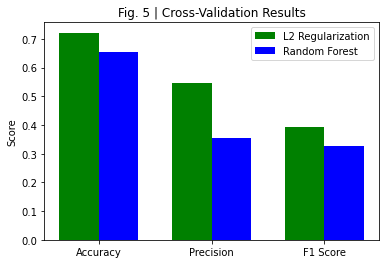

In [32]:
# Define the regularization methods
methods = ['Accuracy', 'Precision', 'F1 Score']

# Define the mean scores for L2 regularization and Random Forest
l2_scores = [l2_mean_score, l2_mean_score_p, l2_mean_score_f1]
rf_scores = [cv_scores_mean, precision_mean, f1_mean]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(methods))
r2 = [x + bar_width for x in r1]

# Plot the bars for L2 regularization and Random Forest
plt.bar(r1, l2_scores, color='g', width=bar_width, label='L2 Regularization')
plt.bar(r2, rf_scores, color='b', width=bar_width, label='Random Forest')

# Set the x-axis labels
plt.xticks([r + bar_width/2 for r in range(len(methods))], methods)

# Add a legend
plt.legend()

# Set the title and y-axis label
plt.title('Fig. 5 | Cross-Validation Results')
plt.ylabel('Score')

# Show the plot
plt.show()


As seen in the Fig. 5 above, the L2 Regularization model performs better than the Random Forest Classifier model. L2 has a higher mean accuracy, precision, and F1 score in their cross-validation

In [30]:
# Get feature importances from the Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the top five most important features
top_five_features = importance_df.head(5)
print("Top five most important features:")
print(top_five_features)


Top five most important features:
                Feature  Importance
2  FractionalShortening    0.213450
3                  epss    0.204625
4                  lvdd    0.203706
1   PericardialEffusion    0.183041
0      AgeAtHeartAttack    0.161179


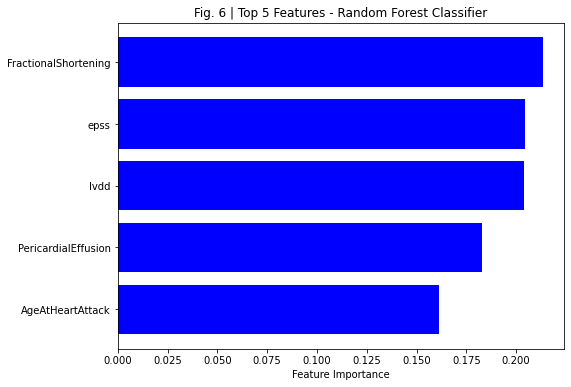

In [33]:
# Plot the top five features and their importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(top_five_features)), top_five_features['Importance'], color='blue')
plt.yticks(range(len(top_five_features)), top_five_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Fig. 6 | Top 5 Features - Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert the y-axis to display features in descending order
plt.show()

Fig. 6 shows the top 5 important features in the Random Forest Classifier model.